In [4]:
import pandas as pd

In [22]:
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


 ### Univariate selection 

In [24]:
x = df.iloc[:,:-1]
y = df['price_range']
y.head(5)

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [26]:
## SelectKBest help to select top 5 feature of dataset
from sklearn.feature_selection import SelectKBest
## for applying statistical analysis give two output P values
from sklearn.feature_selection import chi2

In [29]:
### Apply SelectKBest Algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k=10)
ordered_features = ordered_rank_features.fit(x,y)
ordered_features

SelectKBest(score_func=<function chi2 at 0x0000015E3F24F370>)

In [39]:
dfscores = pd.DataFrame(ordered_features.scores_,columns=['Score'])
dfcolumns = pd.DataFrame(x.columns)

In [46]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns = ['features','Score']
features_rank

,features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [47]:
features_rank.nlargest(10,'Score')

,features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Feature Importance
This technique gives you a score fo reach feature of your data the higher score more relevant it is

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [51]:
print(model.feature_importances_)

[0.06092129 0.02009685 0.03208318 0.01957834 0.0326339  0.01672864
 0.03588608 0.03387766 0.03682477 0.03333015 0.03356512 0.04747351
 0.04823258 0.39395149 0.03340042 0.03318401 0.03513776 0.01491482
 0.01840875 0.01977069]


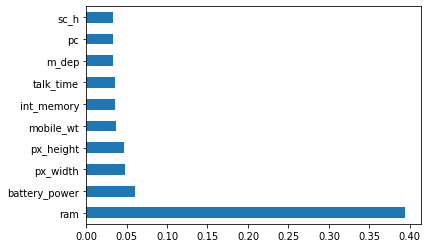

In [59]:
ranked_features = pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Correlation

<AxesSubplot:>

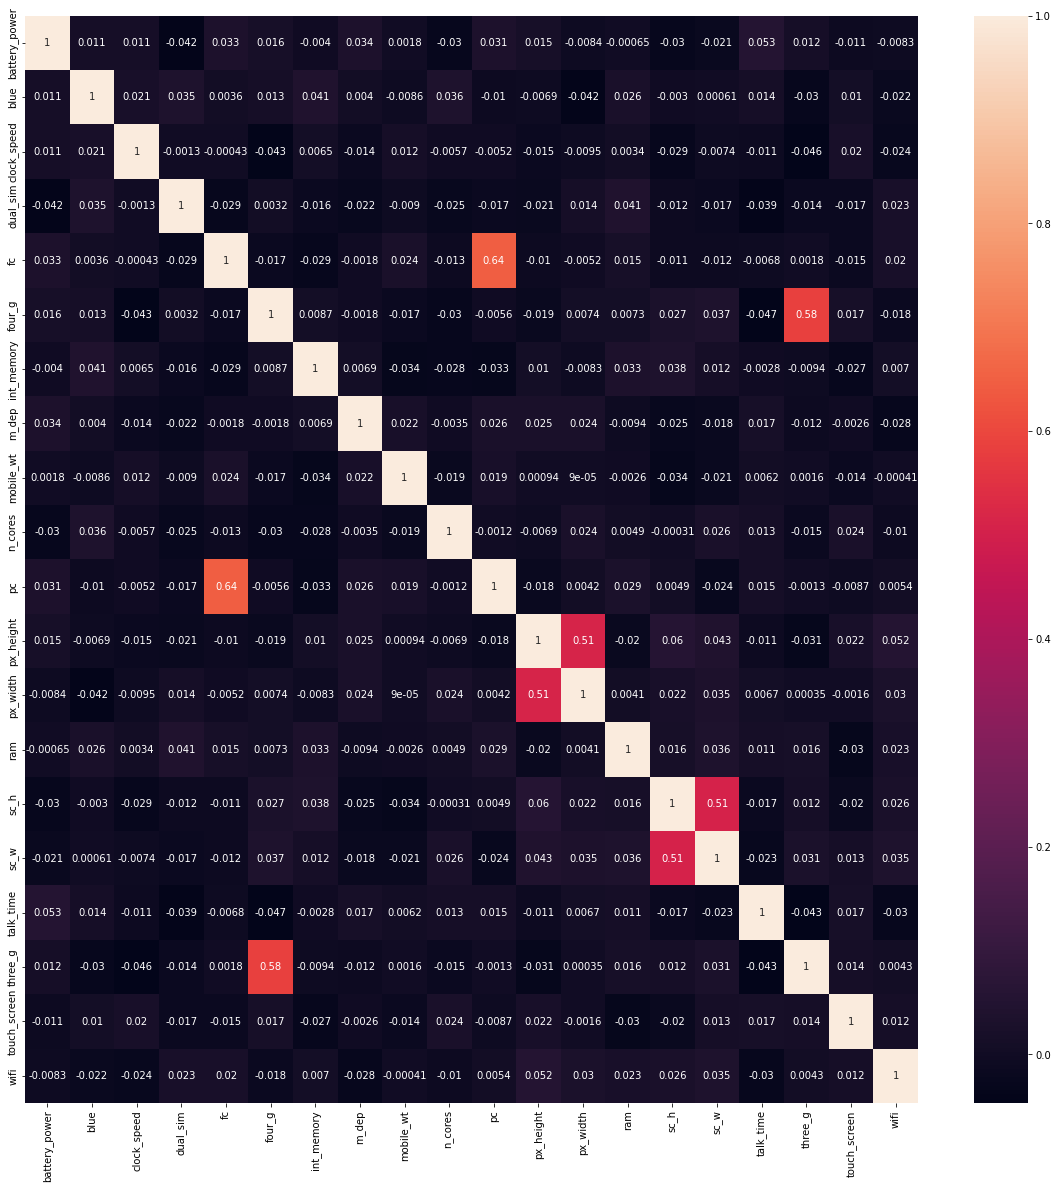

In [64]:
import seaborn as sns
corr = df.iloc[:,:-1].corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

### Remove the correlated

In [75]:
threshold=0.5

In [76]:
# find and remove correlated features
def correlation(dataset, threshold): 
    col_corr = set() # Set of all the names of correlated columns 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i] # getting the name of column 
                col_corr.add(colname) 
    return col_corr

In [77]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

# information gain

In [80]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x,y)

In [91]:
mutual_data = pd.Series(mutual_info, index=x.columns)
mutual_data.nlargest(10).sort_values(ascending=False)

ram              0.847076
px_height        0.032093
px_width         0.026794
battery_power    0.026735
n_cores          0.020010
dual_sim         0.015757
talk_time        0.010498
fc               0.008690
pc               0.005784
blue             0.002831
dtype: float64